In [1]:
pip install Pillow matplotlib numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


FileUpload(value={}, accept='image/*', description='Upload')

IntSlider(value=5, description='Number of Colors:', max=20, min=1)

Button(description='Extract Colors', style=ButtonStyle())

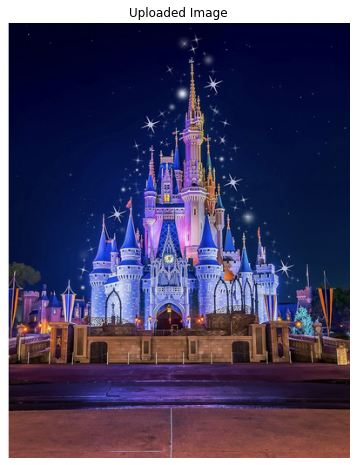

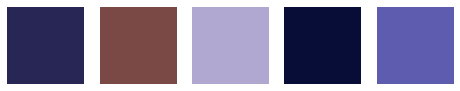

#272655
#7a4945
#b1a8d1
#070d36
#5d5caf


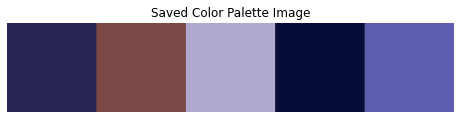

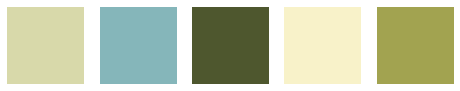


Suggested Applications for the Color Palette:
- Graphic design
- Branding
- Web design


In [4]:
### import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display
import io
import matplotlib.patches as patches

# Function to upload and display image
def upload_image(change):
    global img, pixels
    uploaded_file = next(iter(change['new'].values()))
    content = uploaded_file['content']
    img = Image.open(io.BytesIO(content))
    img.thumbnail((500, 500), Image.ANTIALIAS)  # Resize while maintaining aspect ratio
    img_array = np.array(img)
    
    # Ensure the image has 3 channels (RGB)
    if img_array.ndim == 2:  # grayscale image
        img_array = np.stack((img_array,)*3, axis=-1)
    elif img_array.shape[2] == 4:  # RGBA image
        img_array = img_array[:, :, :3]
    
    pixels = img_array.reshape(-1, 3)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()
    
# Function to extract and display color palette
def extract_colors(k=5):
    if 'pixels' in globals():
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pixels)
        colors = kmeans.cluster_centers_.astype(int)
        
        # Plot the colors as a palette
        plt.figure(figsize=(8, 2))
        plt.title("Color Palette")
        for i, color in enumerate(colors):
            plt.subplot(1, k, i + 1)
            plt.imshow([[color/255]])
            plt.axis('off')
        plt.show()

        # Display color hex codes
        hex_colors = ['#%02x%02x%02x' % tuple(color) for color in colors]
        for hex_color in hex_colors:
            print(hex_color)
        
        # Save the palette as an image
        save_palette_as_image(colors)

        # Generate complementary palette
        generate_complementary_palette(colors)

        # Suggest applications for the palette
        suggest_applications(hex_colors)

    else:
        print("Please upload an image first.")

# Function to save the palette as an image
def save_palette_as_image(colors):
    palette_height = 100
    palette_width = 100 * len(colors)
    palette_image = Image.new("RGB", (palette_width, palette_height))

    for i, color in enumerate(colors):
        for x in range(i * 100, (i + 1) * 100):
            for y in range(100):
                palette_image.putpixel((x, y), tuple(color))

    palette_image.save("color_palette.png")
    display_palette_image(palette_image)

# Function to display the saved palette image
def display_palette_image(palette_image):
    plt.figure(figsize=(8, 2))
    plt.title("Saved Color Palette Image")
    plt.imshow(palette_image)
    plt.axis('off')
    plt.show()

# Function to generate and display complementary palette
def generate_complementary_palette(colors):
    complementary_colors = [(255 - color[0], 255 - color[1], 255 - color[2]) for color in colors]
    
    plt.figure(figsize=(8, 2))
    plt.title("Complementary Color Palette")
    for i, color in enumerate(complementary_colors):
        plt.subplot(1, len(complementary_colors), i + 1)
        plt.imshow([[(np.array(color)/255)]])
        plt.axis('off')
    plt.show()

# Function to suggest applications for the palette
def suggest_applications(hex_colors):
    applications = ["Web design", "Room decor", "Fashion design", "Graphic design", "Branding"]
    suggestions = np.random.choice(applications, size=3, replace=False)
    
    print("\nSuggested Applications for the Color Palette:")
    for suggestion in suggestions:
        print(f"- {suggestion}")

# Widget to upload image
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
upload_widget.observe(upload_image, names='value')

# Widget to select number of colors
color_count_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Number of Colors:')

# Button to extract colors
extract_button = widgets.Button(description="Extract Colors")
extract_button.on_click(lambda b: extract_colors(color_count_slider.value))

# Display widgets
display(upload_widget, color_count_slider, extract_button)
